# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
marsWeatherSoup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
allWeatherData = marsWeatherSoup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
columns = marsWeatherSoup.find_all("th")
columnNames = []
for header in columns:
    columnNames.append(header.text)
columnNames

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Create an empty list
weatherList = []
# Loop through the scraped data to create a list of rows
for row in allWeatherData:
    temp_list = []
    for element in row.find_all('td'):
        temp_list.append(element.text)
    weatherList.append(temp_list)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(weatherList, columns=columnNames)

In [9]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_weather_df[["sol","ls","month"]] = mars_weather_df[["sol","ls","month"]].astype("int64")
mars_weather_df[["min_temp","pressure"]] = mars_weather_df[["min_temp","pressure"]].astype("float64")
mars_weather_df["terrestrial_date"] = mars_weather_df["terrestrial_date"].astype("datetime64[ns]")

In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


#### How many months exist on Mars?

By using `.nunique()` we are able to see that the count of the number of unique months logged by the Curiosity rover is `12`.

In [13]:
# 1. How many months are there on Mars?
mars_weather_df["month"].nunique()

12

#### How many Martian (and not Earth) days worth of data exist in the scraped dataset?

By using `.nunique()` again, we are able to see that the count of the number of unique sols logged by the Curiosity rover is `1867`.

In [14]:
# 2. How many Martian days' worth of data are there?
mars_weather_df["sol"].nunique()

1867

#### What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

By grouping the mars weather data by `month` and then averaging the results, we are able to obtain the average minimum temperatures for each month logged by the Curiosity rover. With this data, we can plot the results and see that `Months 3 and 4 have the overall coldest temperatures at -83°C and -82°C` respectively, while `Months 8 and 9 have the warmest overall temperatures at -68°C and -69°C` respectively.

In [15]:
# 3. What is the average low temperature by month?
marsMonthTemp = mars_weather_df.groupby("month").mean()['min_temp']
marsMonthTemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

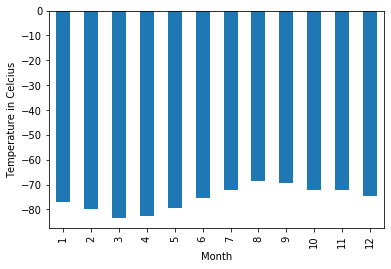

In [16]:
# Plot the average temperature by month
marsMonthTemp.plot.bar()
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")
plt.savefig("outputs/average_monthly_min_temp.png",bbox_inches="tight")
plt.show()

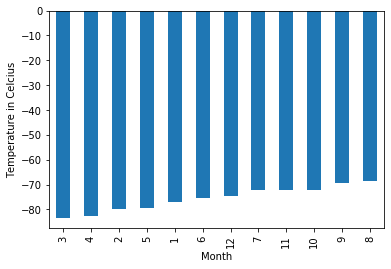

In [17]:
# Identify the coldest and hottest months in Curiosity's location
marsSorted = marsMonthTemp.sort_values(ascending=True)

marsSorted.plot.bar()
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")
plt.savefig("outputs/average_monthly_min_temp_sorted.png",bbox_inches="tight")
plt.show()

#### Which months have the lowest and the highest atmospheric pressure on Mars?

Similar to what we did above, we are able to group the mars weather data by `month` and then average the results to find the average atmospheric pressure by month logged by the Curiosity rover. From this data, we can plot the results and easily see that `Month 9 had the highest atmospheric pressure at 913.305970` while `Month 6 had the lowest atmospheric pressure at 745.054422`.

In [18]:
# 4. Average pressure by Martian month
marsMonthPressure = mars_weather_df.groupby("month").mean()['pressure']
marsMonthPressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

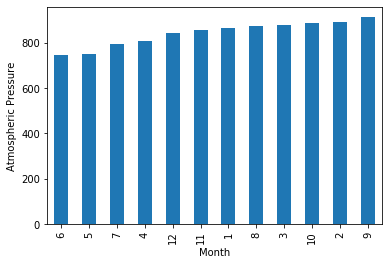

In [19]:
# Plot the average pressure by month
marsMonthPressureSorted = marsMonthPressure.sort_values(ascending=True)
marsMonthPressureSorted.plot.bar()
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.savefig("outputs/average_monthly_pressure_sorted.png",bbox_inches="tight")
plt.show()

#### About how many terrestrial (Earth) days exist in a Martian year?

To find how many Earth days exist in a Martian year, we can first plot the entire mars weather data with the logged days on the x-axis and the minimum temperatures on the y-axis. Doing so will give us a visualization of temperature fluctuations and we can see that the distance from peak to peak is roughly 1425-750, or `675 days`. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to `687 earth days`.

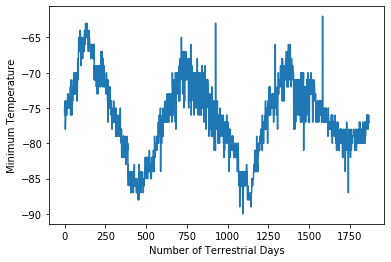

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_weather_df.plot(y='min_temp', legend=False)
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.savefig("outputs/total_terrestrial_days.png",bbox_inches="tight")
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_weather_df.to_csv("outputs/mars_weather.csv",index=False)

In [22]:
browser.quit()